## 线性回归

In [1]:
### numpy版本为1.20.3
import numpy as np
import pandas as pd

In [2]:
### 初始化模型参数
def initialize_params(dims):
    '''
    输入：
    dims：训练数据变量维度
    输出：
    w：初始化权重参数值
    b：初始化偏差参数值
    '''
    # 初始化权重参数为零矩阵
    w = np.zeros((dims, 1))
    # 初始化偏差参数为零
    b = 0
    return w, b

In [3]:
### 定义模型主体部分
### 包括线性回归公式、均方损失和参数偏导三部分
def linear_loss(X, y, w, b):
    '''
    输入:
    X：输入变量矩阵
    y：输出标签向量
    w：变量参数权重矩阵
    b：偏差项
    输出：
    y_hat：线性模型预测输出
    loss：均方损失值
    dw：权重参数一阶偏导
    db：偏差项一阶偏导
    '''
    # 训练样本数量
    num_train = X.shape[0]
    # 训练特征数量
    num_feature = X.shape[1]
    # 线性回归预测输出
    y_hat = np.dot(X, w) + b
    # 计算预测输出与实际标签之间的均方损失
    loss = np.sum((y_hat-y)**2)/num_train
    # 基于均方损失对权重参数的一阶偏导数
    dw = np.dot(X.T, (y_hat-y)) /num_train
    # 基于均方损失对偏差项的一阶偏导数
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [4]:
### 定义线性回归模型训练过程
def linear_train(X, y, learning_rate=0.01, epochs=10000):
    '''
    输入：
    X：输入变量矩阵
    y：输出标签向量
    learning_rate：学习率
    epochs：训练迭代次数
    输出：
    loss_his：每次迭代的均方损失
    params：优化后的参数字典
    grads：优化后的参数梯度字典
    '''
    # 记录训练损失的空列表
    loss_his = []
    # 初始化模型参数
    w, b = initialize_params(X.shape[1])
    # 迭代训练
    for i in range(1, epochs):
        # 计算当前迭代的预测值、损失和梯度
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        # 基于梯度下降的参数更新
        w += -learning_rate * dw
        b += -learning_rate * db
        # 记录当前迭代的损失
        loss_his.append(loss)
        # 每1000次迭代打印当前损失信息
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
        # 将当前迭代步优化后的参数保存到字典
        params = {
            'w': w,
            'b': b
        }
        # 将当前迭代步的梯度保存到字典
        grads = {
            'dw': dw,
            'db': db
        }     
    return loss_his, params, grads

In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


In [6]:
# 导入sklearn diabetes数据接口
from sklearn.datasets import load_diabetes
# 导入sklearn打乱数据函数
from sklearn.utils import shuffle
# 获取diabetes数据集
diabetes = load_diabetes()
# 获取输入和标签
data, target = diabetes.data, diabetes.target 
# 打乱数据集
X, y = shuffle(data, target, random_state=13)
# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
# 将训练集改为列向量的形式
y_train = y_train.reshape((-1,1))
# 将验证集改为列向量的形式
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


In [7]:
# 线性回归模型训练
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 3679.873871
epoch 20000 loss 3219.172176
epoch 30000 loss 3040.829025
epoch 40000 loss 2944.946042
epoch 50000 loss 2886.001465
epoch 60000 loss 2848.062023
epoch 70000 loss 2823.167512
epoch 80000 loss 2806.638399
epoch 90000 loss 2795.557600
epoch 100000 loss 2788.062319
epoch 110000 loss 2782.946651
epoch 120000 loss 2779.422110
epoch 130000 loss 2776.968860
epoch 140000 loss 2775.241691
epoch 150000 loss 2774.009842
epoch 160000 loss 2773.118101
epoch 170000 loss 2772.461448
epoch 180000 loss 2771.968407
epoch 190000 loss 2771.590041
{'w': array([[  10.5661704 ],
       [-236.41306194],
       [ 481.51515861],
       [ 294.45947127],
       [ -60.99315051],
       [-110.54104853],
       [-206.43992196],
       [ 163.23392753],
       [ 409.28833663],
       [  65.73408722]]), 'b': 150.8145468492325}


In [8]:
### 定义线性回归预测函数
def predict(X, params):
    '''
    输入：
    X：测试数据集
    params：模型训练参数
    输出：
    y_pred：模型预测结果
    '''
    # 获取模型参数
    w = params['w']
    b = params['b']
    # 预测
    y_pred = np.dot(X, w) + b
    return y_pred
# 基于测试集的预测
y_pred = predict(X_test, params)
# 打印前五个预测值
y_pred[:5]

array([[ 82.05572177],
       [167.22504283],
       [112.38551371],
       [138.15554651],
       [174.7198115 ]])

In [9]:
print(y_test[:5])

[[ 37.]
 [122.]
 [ 88.]
 [214.]
 [262.]]


In [10]:
### 定义R2系数函数
def r2_score(y_test, y_pred):
    '''
    输入：
    y_test：测试集标签值
    y_pred：测试集预测值
    输出：
    r2：R2系数
    '''
    # 测试标签均值
    y_avg = np.mean(y_test)
    # 总离差平方和
    ss_tot = np.sum((y_test - y_avg)**2)
    # 残差平方和
    ss_res = np.sum((y_test - y_pred)**2)
    # R2计算
    r2 = 1 - (ss_res/ss_tot)
    return r2

In [11]:
print(r2_score(y_test, y_pred))

0.5334204308239403


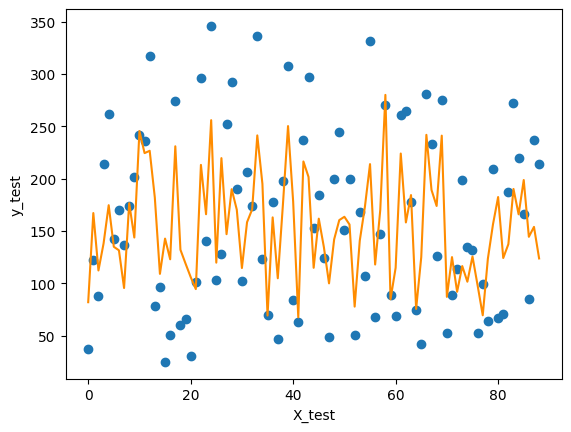

In [12]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show();

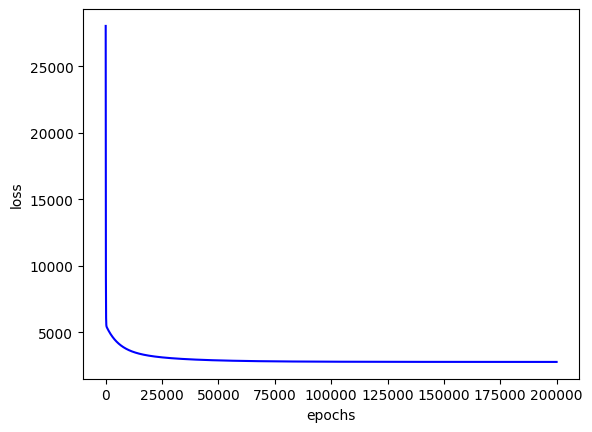

In [13]:
plt.plot(loss_his, color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [14]:
### sklearn版本为1.0.2
# 导入线性回归模块
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# 创建模型实例
regr = linear_model.LinearRegression()
# 模型拟合
regr.fit(X_train, y_train)
# 模型预测
y_pred = regr.predict(X_test)
# 打印模型均方误差
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# 打印R2
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3371.87
R2 score: 0.54
